## Hypothesis Testing

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

Load the Dataset

In [4]:
dataset= sns.load_dataset('tips')

In [5]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Implementation of Chi-square Test

The Chi Square statistic is commonly used for testing relationships between categorical variables.  The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.  An example research question that could be answered using a Chi-Square analysis would be:

Is there a significant relationship between voter intent and political party membership?

In [6]:
dataset_table=pd.crosstab(dataset['sex'],dataset['smoker'])
print(dataset_table)

smoker  Yes  No
sex            
Male     60  97
Female   33  54


In [10]:
##Observed value
observed_value=dataset_table.values
print('Observed values\n',observed_value)

Observed values
 [[60 97]
 [33 54]]


In [11]:
val=stats.chi2_contingency(dataset_table)

In [12]:
val

(0.008763290531773594, 0.925417020494423, 1, array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [13]:
expected_values=val[3]
print(expected_values)

[[59.84016393 97.15983607]
 [33.15983607 53.84016393]]


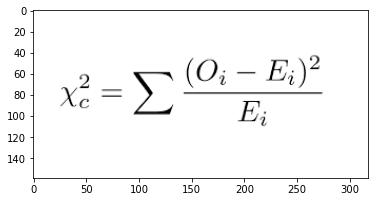

In [28]:
img=plt.imread('chi-square.png')
plt.imshow(img)


In [14]:
# degree of freedom
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print('Degree of freedom:',ddof)
aplha=0.05

Degree of freedom: 1


In [16]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2/e for o,e in zip(observed_value,expected_values)])

In [17]:
chi_square

array([0.00119737, 0.00073745])

In [18]:
chi_square_statistics=chi_square[0]+chi_square[1]
print('chi-square statistics:-',chi_square_statistics)

chi-square statistics:- 0.001934818536627623


In [20]:
#p value
p_value=chi2.cdf(x=chi_square_statistics,df=ddof)
print('p-value:',p_value)
print('Significance value:',aplha)
print('Degree of freedom:',ddof)

p-value: 0.03508489268426801
Significance value: 0.05
Degree of freedom: 1


In [21]:
if p_value <= aplha:
    print('Reject H0,There is a relationship betwenn 2 catogorical variable')
else:
    print('Retain H0,There is a relationship betwenn 2 catogorical variable')

Reject H0,There is a relationship betwenn 2 catogorical variable


## Implementation of T-Test

A t-test is a type of inferential statistic used to determine if there is a significant difference between the means of two groups, which may be related in certain features

In [32]:
def plot_distribution(inp):
    plt.figure()
    ax=sns.distplot(inp)
    plt.axvline(np.mean(inp),color='k',linestyle='dashed',linewidth=5)
    
    
    return plt.figure


In [33]:
len(dataset['total_bill'])

244

In [36]:
dataset['total_bill'].mean()

19.785942622950824

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

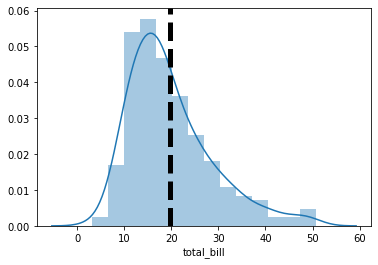

In [34]:
plot_distribution(dataset['total_bill'])

In [37]:
dataset['tip'].mean()

2.9982786885245902

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

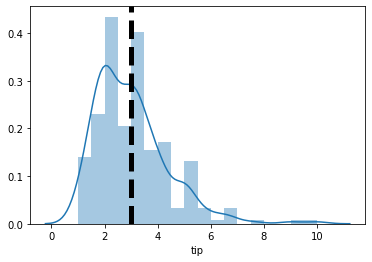

In [35]:
plot_distribution(dataset['tip'])

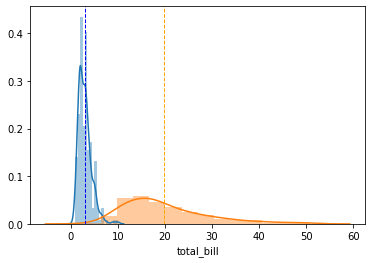

In [41]:
plt.figure()
ax1=sns.distplot(dataset['tip'])
ax2=sns.distplot(dataset['total_bill'])
plt.axvline(np.mean(dataset['tip']),color='blue',linestyle='dashed',linewidth=1)
plt.axvline(np.mean(dataset['total_bill']),color='orange',linestyle='dashed',linewidth=1)

H0:There is difference in mean value of tip and total_bill
H1:There is no difference between mean value.

In [45]:
def compare_2_groups(arr1,arr2,alpha,sample_size):
    stat,p= ttest_ind(arr1,arr2)
    print('Statistics=%.3f,p=%.3f'%(stat,p))
    if p > alpha:
        print("Same distribution( reject H0 and accept H1)")
    else:
        print('Different distribution(fail to accept alternate hypothisis)')
        

In [46]:
sample_size=40
tip_sample=np.random.choice(dataset['tip'],sample_size)
total_bill_size=np.random.choice(dataset['total_bill'],sample_size)
compare_2_groups(tip_sample,total_bill_size,0.05,sample_size)

Statistics=-12.631,p=0.000
Different distribution(fail to accept alternate hypothisis)
